In [43]:
import tskit
import pyslim
import msprime
import itertools
import operator
import numpy as np
from collections import defaultdict

In [44]:
orig_ts = tskit.load('minimal_recmap_het_test.trees')

In [45]:
orig_ts

In [46]:
rts = pyslim.recapitate(orig_ts,10)

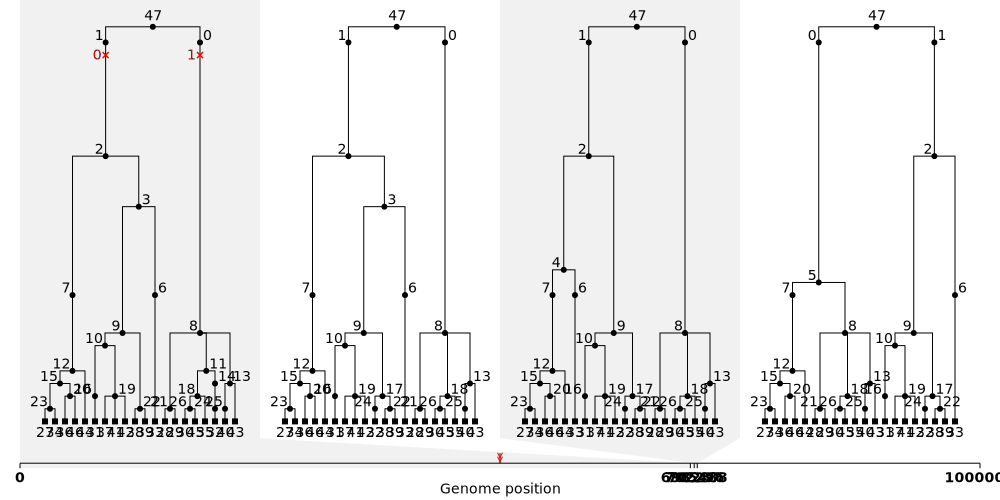

In [47]:
rts.draw_svg(size=(1000,500))

In [48]:
def edges_by_child_timeasc(ts):
    # edges sorted by child node time, then child node id using np.lexsort
    it = (ts.edge(u) for u in np.lexsort((ts.edges_child, ts.nodes_time[ts.edges_child])))
    return itertools.groupby(it, operator.attrgetter("child"))


chi_ids = []
use_nodes = (rts.nodes_flags & tskit.NODE_IS_SAMPLE) != 0
for child_id, edges in edges_by_child_timeasc(rts):
    if len({e.parent for e in edges}) > 1:
        use_nodes[child_id] = True
        chi_ids.append(child_id)
        print(child_id)
sim_ts, mapp = rts.simplify(np.where(use_nodes)[0], update_sample_flags=False, map_nodes=True) # keep the nodes with multiple parents, but don't flag as samples
[mapp[ch] for ch in chi_ids]

22
24
18
8
9
6
7


[np.int32(5),
 np.int32(6),
 np.int32(4),
 np.int32(2),
 np.int32(3),
 np.int32(0),
 np.int32(1)]

In [49]:
sim_ts

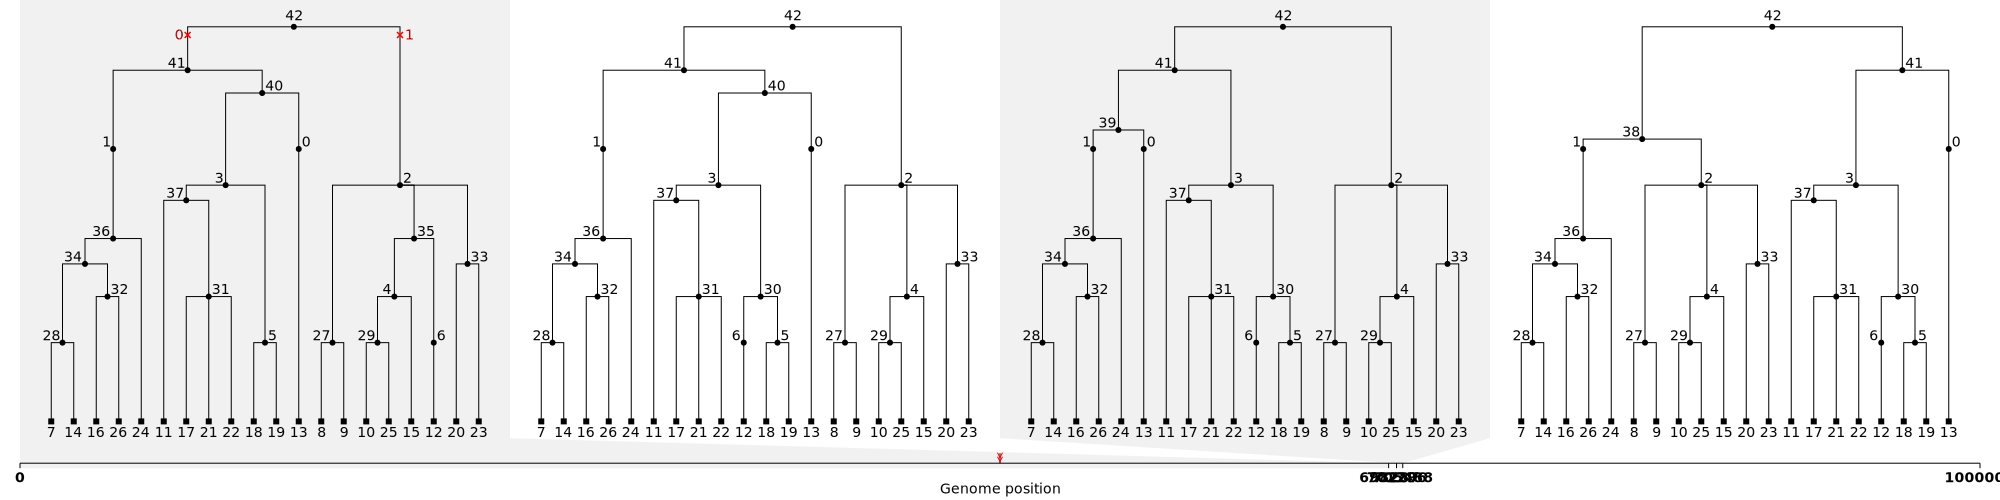

In [50]:
sim_ts.draw_svg(size=(2000,500), time_scale='log_time')

In [51]:
# Check edges for Node 22 (The sample that recombined)
print("edges for node 22:")
for edge in sim_ts.edges():
    if edge.child == 22:
        print(f"Interval [{edge.left}, {edge.right}] -> Parent {edge.parent}")

# Check edges for Node 1 (The ancestor)
print("\nedges for node 1:")
for edge in sim_ts.edges():
    if edge.child == 1:
        print(f"Interval [{edge.left}, {edge.right}] -> Parent {edge.parent}")

edges for node 22:
Interval [0.0, 1000000.0] -> Parent 31

edges for node 1:
Interval [705488.0, 1000000.0] -> Parent 38
Interval [702296.0, 705488.0] -> Parent 39
Interval [0.0, 702296.0] -> Parent 41
